# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Read In Data

In [3]:
df = pd.read_csv('../../DATA/filled_toxicity_df.csv')

df.head()

,mol_id,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,...,1,0,0,0,0,1,0,0,0,0
1,TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.set_index('mol_id', inplace=True)

df.head()

,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,AromaticProportion,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,0.5625,...,1,0,0,0,0,1,0,0,0,0
TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,0.4000,...,0,0,0,0,0,0,0,0,0,0
TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,0.3000,...,0,0,0,0,0,0,0,0,0,0
TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount',
       'AromaticProportion', 'LogS_ESOL', 'PositiveCharges', 'NegativeCharges',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity',
       'Heteroatoms', 'HalogenCount', 'PhenolicGroups', 'NR-AR', 'NR-AR-LBD',
       'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
       'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
      dtype='object')

In [12]:
subset_0 = df[df['SR-ARE'] == 0].sample(n=1404, random_state=42)

subset_1 = df[df['SR-ARE'] == 1]

balanced_df = pd.concat([subset_0, subset_1])

features_df = balanced_df[['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount', 'LogS_ESOL',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity']]

target_df = balanced_df[['SR-ARE']]

In [13]:
target_df.value_counts()

SR-ARE
0         1404
1         1404
dtype: int64

# Stacking Classfier

### with ```LogisticRegression```, ```RandomForestClassifier``` and ```XGBoost```

In [14]:
features_df_fe = features_df.copy()

features_df_fe['TPSA_LogP'] = features_df['TPSA'] * features_df['LogP']

features_df_fe['MW_per_HBD'] = features_df['MolecularWeight'] / (features_df['HBDonors'] + 1e-6)

features_df_fe['LogP_div_HBA'] = features_df['LogP'] / (features_df['HBAcceptors'] + 1e-6)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_val, y_train, y_val = train_test_split(
    features_df_fe, target_df.values.ravel(),
    test_size=0.2, stratify=target_df, random_state=42
)

logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg_params = {
    'C': [0.1, 1, 10]
}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc', n_jobs=1)
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft' 
)
voting_clf.fit(X_train, y_train)

for name, model in voting_clf.named_estimators_.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"{name.upper()} AUC: {auc:.4f}")

y_pred_proba = voting_clf.predict_proba(X_val)[:, 1]
ensemble_auc = roc_auc_score(y_val, y_pred_proba)
print(f"Ensemble AUC: {ensemble_auc:.4f}")

LR AUC: 0.5439
RF AUC: 0.7699
XGB AUC: 0.7638
Ensemble AUC: 0.7719


In [16]:
from sklearn.metrics import classification_report

print("\n--- Classification Reports ---\n")

for name, model in voting_clf.named_estimators_.items():
    y_pred = model.predict(X_val)
    print(f"{name.upper()} Classification Report:")
    print(classification_report(y_val, y_pred))
    print('-' * 60)

# Ensemble model
ensemble_pred = voting_clf.predict(X_val)
print("ENSEMBLE Classification Report:")
print(classification_report(y_val, ensemble_pred))


--- Classification Reports ---

LR Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       281
           1       0.50      0.99      0.67       281

    accuracy                           0.50       562
   macro avg       0.50      0.50      0.34       562
weighted avg       0.50      0.50      0.34       562

------------------------------------------------------------
RF Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       281
           1       0.71      0.69      0.70       281

    accuracy                           0.70       562
   macro avg       0.70      0.70      0.70       562
weighted avg       0.70      0.70      0.70       562

------------------------------------------------------------
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       281
   

## Removing LR from the Equation

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_val, y_train, y_val = train_test_split(
    features_df_fe, target_df.values.ravel(),
    test_size=0.2, stratify=target_df, random_state=42
)

logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg_params = {
    'C': [0.1, 1, 10]
}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc', n_jobs=1)
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft' 
)
voting_clf.fit(X_train, y_train)

for name, model in voting_clf.named_estimators_.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"{name.upper()} AUC: {auc:.4f}")

y_pred_proba = voting_clf.predict_proba(X_val)[:, 1]
ensemble_auc = roc_auc_score(y_val, y_pred_proba)
print(f"Ensemble AUC: {ensemble_auc:.4f}")

RF AUC: 0.7699
XGB AUC: 0.7638
Ensemble AUC: 0.7716


In [18]:
from sklearn.metrics import classification_report

print("\n--- Classification Reports ---\n")

for name, model in voting_clf.named_estimators_.items():
    y_pred = model.predict(X_val)
    print(f"{name.upper()} Classification Report:")
    print(classification_report(y_val, y_pred))
    print('-' * 60)

# Ensemble model
ensemble_pred = voting_clf.predict(X_val)
print("ENSEMBLE Classification Report:")
print(classification_report(y_val, ensemble_pred))


--- Classification Reports ---

RF Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       281
           1       0.71      0.69      0.70       281

    accuracy                           0.70       562
   macro avg       0.70      0.70      0.70       562
weighted avg       0.70      0.70      0.70       562

------------------------------------------------------------
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       281
           1       0.70      0.69      0.70       281

    accuracy                           0.70       562
   macro avg       0.70      0.70      0.70       562
weighted avg       0.70      0.70      0.70       562

------------------------------------------------------------
ENSEMBLE Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       2

## Threshold Evaluation

In [19]:
def evaluate_threshold_rf(rf_model, X_val, y_val, thresholds=np.linspace(0.2, 0.9, 15)):
    y_proba = rf_model.predict_proba(X_val)[:, 1]

    print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba):.4f}")
    print("-" * 60)

    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        print(f"🔹 Threshold: {thresh:.2f}")
        print(classification_report(y_val, y_pred_thresh))
        print("-" * 60)

evaluate_threshold_rf(best_rf, X_val, y_val)

ROC AUC Score: 0.7699
------------------------------------------------------------
🔹 Threshold: 0.20
              precision    recall  f1-score   support

           0       0.87      0.25      0.38       281
           1       0.56      0.96      0.71       281

    accuracy                           0.60       562
   macro avg       0.72      0.60      0.55       562
weighted avg       0.72      0.60      0.55       562

------------------------------------------------------------
🔹 Threshold: 0.25
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       281
           1       0.59      0.93      0.72       281

    accuracy                           0.64       562
   macro avg       0.71      0.64      0.61       562
weighted avg       0.71      0.64      0.61       562

------------------------------------------------------------
🔹 Threshold: 0.30
              precision    recall  f1-score   support

           0       0.78      0.4

Classification Report at threshold 0.55:

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       281
           1       0.74      0.64      0.69       281

    accuracy                           0.71       562
   macro avg       0.71      0.71      0.71       562
weighted avg       0.71      0.71      0.71       562



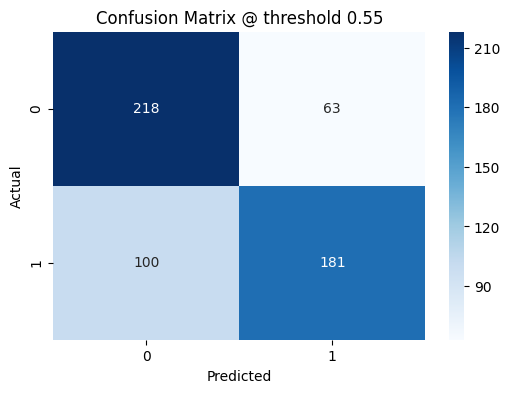

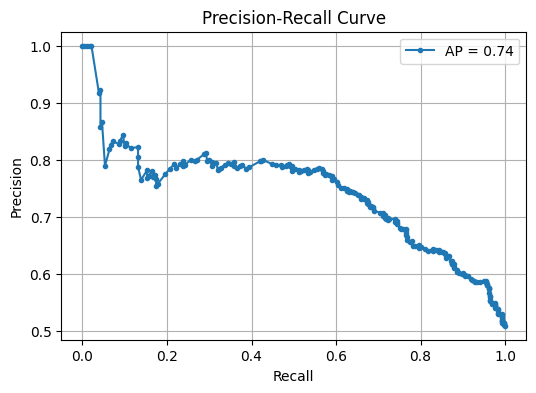

In [20]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score

y_proba = best_rf.predict_proba(X_val)[:, 1]

threshold = 0.55
y_pred = (y_proba >= threshold).astype(int)

print(f"Classification Report at threshold {threshold:.2f}:\n")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix @ threshold {threshold:.2f}")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
ap_score = average_precision_score(y_val, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label=f'AP = {ap_score:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

### Final Voting Classifier with Hyperparameter Tuning and GridSearch

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.combine import SMOTEENN

# 1. Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    features_df_fe, target_df.values.ravel(),
    test_size=0.2, stratify=target_df, random_state=42
)

# 2. Apply SMOTEEN on training data only
smoteen = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteen.fit_resample(X_train, y_train)

# 3. Logistic Regression + GridSearchCV
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg_params = {'C': [0.1, 1, 10]}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc', n_jobs=1)
logreg_grid.fit(X_train_resampled, y_train_resampled)
best_logreg = logreg_grid.best_estimator_

# 4. Random Forest + GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=1)
rf_grid.fit(X_train_resampled, y_train_resampled)
best_rf = rf_grid.best_estimator_

# 5. XGBoost + GridSearchCV
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=1)
xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_

# 6. Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# 7. AUC + Classification Report for individual models
for name, model in voting_clf.named_estimators_.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_proba)
    print(f"\n{name.upper()} AUC: {auc:.4f}")
    print(f"{name.upper()} Classification Report:\n{classification_report(y_val, y_pred)}")

# 8. Ensemble AUC + Classification Report
y_pred_proba = voting_clf.predict_proba(X_val)[:, 1]
y_pred_ensemble = voting_clf.predict(X_val)
ensemble_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nEnsemble AUC: {ensemble_auc:.4f}")
print(f"Ensemble Classification Report:\n{classification_report(y_val, y_pred_ensemble)}")


LR AUC: 0.5454
LR Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.02      0.03       281
           1       0.50      0.99      0.67       281

    accuracy                           0.50       562
   macro avg       0.56      0.50      0.35       562
weighted avg       0.56      0.50      0.35       562


RF AUC: 0.7227
RF Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       281
           1       0.64      0.68      0.66       281

    accuracy                           0.65       562
   macro avg       0.65      0.65      0.65       562
weighted avg       0.65      0.65      0.65       562


XGB AUC: 0.7143
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       281
           1       0.64      0.65      0.64       281

    accuracy                           0.64       562


In [22]:
best_model = voting_clf

import pickle

with open('../../Models/SR-ARE/final_voting_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)